In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import os
from pathlib import Path
import pandas as pd

rng = np.random.RandomState(42)
covid_datasets_dir = Path('covid-datasets')
print('Done!')

Done!


C:\Users\SeanK\Anaconda3\envs\py37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading in and filtering Cohen data

In [38]:
cohen_covid_md = pd.read_csv(str(Path('covid-datasets/covid-chestxray-dataset/metadata.csv')))
# Removes all non-covid and non-X-Ray data from dataframe
cohen_covid_md = cohen_meta_data[(cohen_meta_data['modality'] == 'X-ray') & (cohen_meta_data['finding'] == 'COVID-19')]
print(f'Total COVID-19 X-Rays: {cohen_covid_md.shape[0]}')
# Drops all duplicated patient X-rays except for the first X-ray (earliest offset)
cohen_covid_md = cohen_covid_md.drop_duplicates('patientid', keep='first')
print(f'Total Unique Patient COVID-19 X-Rays: {cohen_covid_md.shape[0]}')
# Removes all AP Supine or Lateral X-rays (keeps only PA or AP images)
cohen_covid_md = cohen_covid_md[(cohen_covid_md['view']=='PA') | (cohen_covid_md['view']=='PA')]
print(f'Total Unique Patient COVID-19 PA or AP X-Rays: {cohen_covid_md.shape[0]}')

Total COVID-19 X-Rays: 446
Total Unique Patient COVID-19 X-Rays: 259
Total Unique Patient COVID-19 PA or AP X-Rays: 137


In [32]:
test = cohen_meta_data.sample()
test['filename']`

88    1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg
Name: filename, dtype: object

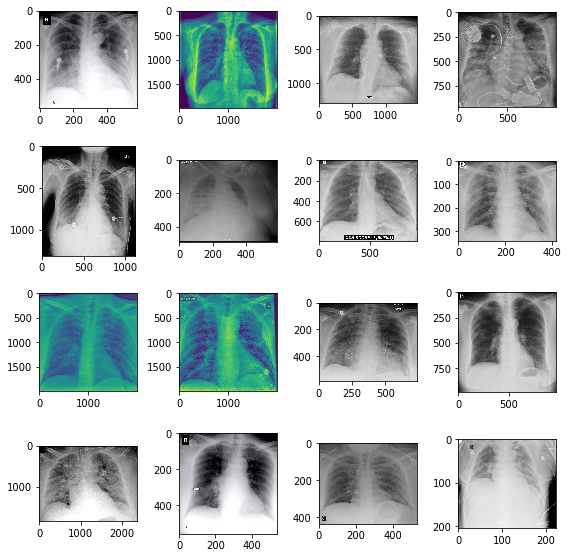

In [5]:
cohen_image_path = covid_datasets_dir / 'covid-chestxray-dataset' / 'images'
# gets a list of all .png and .jpg images in cohen dataset
# cohen_image_paths = sorted(list(cohen_image_paths.glob('**/*.png')) + list(cohen_image_paths.glob('**/*.jpg')))


fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8,8))
for idx, ax in zip(rng.randint(len(cohen_image_paths), size=25), axes.ravel()):
    image = plt.imread(str(cohen_image_paths[idx]))
    ax.imshow(image)
plt.tight_layout()
plt.show()